CARBON BUDGET 'FUEL TANK' CALCULATION
Starting budget (Jan 2020):    500 GtCO₂
Years elapsed since 2020:      6.04 years
Annual emissions rate:         37.4 GtCO₂/year
Emissions used so far:         226.1 GtCO₂
Budget remaining:              273.9 GtCO₂
Percentage used:               45.2%
Percentage remaining:          54.8%


C:\Users\linas\AppData\Local\Temp\ipykernel_30604\2510940167.py:148: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Dokumente\FH Kiel\Data Visualization\.DaVi\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


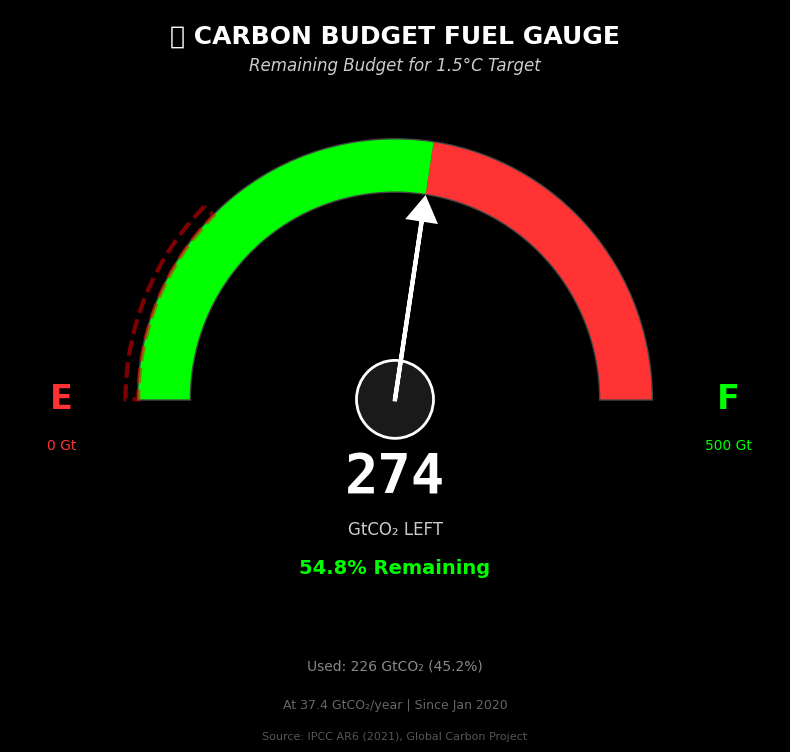


✓ Fuel gauge visualization saved!
  Needle position: 45.2% used


In [3]:
# ============================================
# CARBON BUDGET "FUEL TANK" CALCULATOR
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime

# Load your CO2 data
co2_data = pd.read_csv('data/co2_mm_mlo.csv', comment='#')

# ============================================
# STEP 1: CALCULATE EMISSIONS USED
# ============================================

# Carbon budget parameters (IPCC AR6, 2021)
CARBON_BUDGET_START = 500  # GtCO2 from Jan 2020
BUDGET_START_DATE = datetime(2020, 1, 1)
ANNUAL_EMISSIONS = 37.4  # GtCO2 per year (Global Carbon Project 2023)

# Calculate time elapsed since budget start
current_date = datetime.now()
years_elapsed = (current_date - BUDGET_START_DATE).total_seconds() / (365.25 * 24 * 3600)

# Calculate emissions used
emissions_used = ANNUAL_EMISSIONS * years_elapsed
budget_remaining = CARBON_BUDGET_START - emissions_used

# Calculate percentages
pct_used = (emissions_used / CARBON_BUDGET_START) * 100
pct_remaining = 100 - pct_used

print("CARBON BUDGET 'FUEL TANK' CALCULATION")
print("=" * 60)
print(f"Starting budget (Jan 2020):    {CARBON_BUDGET_START} GtCO₂")
print(f"Years elapsed since 2020:      {years_elapsed:.2f} years")
print(f"Annual emissions rate:         {ANNUAL_EMISSIONS} GtCO₂/year")
print(f"Emissions used so far:         {emissions_used:.1f} GtCO₂")
print(f"Budget remaining:              {budget_remaining:.1f} GtCO₂")
print(f"Percentage used:               {pct_used:.1f}%")
print(f"Percentage remaining:          {pct_remaining:.1f}%")
print("=" * 60)

# ============================================
# STEP 2: CREATE FUEL GAUGE VISUALIZATION
# ============================================

fig, ax = plt.subplots(figsize=(8, 8), facecolor='#000000')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.axis('off')
ax.set_facecolor('#000000')

# Draw gauge arc (semi-circle)
# Empty (right) to Full (left)
theta_start = 0  # Right side
theta_end = 180  # Left side

# Background arc (full capacity)
bg_arc = Wedge((0, 0), 1, theta_start, theta_end, width=0.2,
               facecolor='#2a2a2a', edgecolor='#444444', linewidth=2)
ax.add_patch(bg_arc)

# Calculate needle angle
# 0% used = 0° (right, "Full"), 100% used = 180° (left, "Empty")
needle_angle = pct_used * 1.8  # Scale to 180 degrees

# Used portion (red arc) - from right going left
used_arc = Wedge((0, 0), 1, theta_start, needle_angle, width=0.2,
                 facecolor='#ff3333', edgecolor='none')
ax.add_patch(used_arc)

# Remaining portion (green arc)
remaining_arc = Wedge((0, 0), 1, needle_angle, theta_end, width=0.2,
                      facecolor='#00ff00', edgecolor='none')
ax.add_patch(remaining_arc)

# Warning zone (last 25% = 135-180 degrees)
warning_arc = Wedge((0, 0), 1.05, 135, 180, width=0.05,
                    facecolor='none', edgecolor='#ff0000', linewidth=3,
                    linestyle='--', alpha=0.5)
ax.add_patch(warning_arc)

# Draw needle
needle_rad = np.radians(needle_angle)
needle_x = 0.7 * np.cos(needle_rad)
needle_y = 0.7 * np.sin(needle_rad)
ax.arrow(0, 0, needle_x, needle_y, head_width=0.1, head_length=0.08,
         fc='white', ec='white', linewidth=3, zorder=10)

# Center hub
center = Circle((0, 0), 0.15, facecolor='#1a1a1a', edgecolor='white', linewidth=2)
ax.add_patch(center)

# Labels on gauge
# "F" on right (Full budget)
ax.text(1.3, 0, 'F', fontsize=24, fontweight='bold', color='#00ff00',
        ha='center', va='center')
ax.text(1.3, -0.15, '500 Gt', fontsize=10, color='#00ff00',
        ha='center', va='top')

# "E" on left (Empty)
ax.text(-1.3, 0, 'E', fontsize=24, fontweight='bold', color='#ff3333',
        ha='center', va='center')
ax.text(-1.3, -0.15, '0 Gt', fontsize=10, color='#ff3333',
        ha='center', va='top')

# Center display - Budget remaining
ax.text(0, -0.3, f'{budget_remaining:.0f}', fontsize=40, fontweight='bold',
        color='#ffffff', ha='center', va='center', family='monospace')
ax.text(0, -0.5, 'GtCO₂ LEFT', fontsize=12, color='#cccccc',
        ha='center', va='center')

# Percentage display
if pct_remaining > 25:
    color = '#00ff00'
elif pct_remaining > 10:
    color = '#ffaa00'
else:
    color = '#ff3333'
    
ax.text(0, -0.65, f'{pct_remaining:.1f}% Remaining', fontsize=14,
        color=color, ha='center', va='center', fontweight='bold')

# Title
ax.text(0, 1.35, '⛽ CARBON BUDGET FUEL GAUGE', fontsize=18,
        fontweight='bold', color='#ffffff', ha='center', va='bottom')
ax.text(0, 1.25, 'Remaining Budget for 1.5°C Target', fontsize=12,
        color='#cccccc', ha='center', va='bottom', style='italic')

# Warning indicator if low
if pct_remaining < 25:
    ax.text(0, 0.4, '⚠️ LOW FUEL ⚠️', fontsize=16, fontweight='bold',
            color='#ff3333', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#ff3333',
                     alpha=0.3, edgecolor='#ff3333', linewidth=2))

# Source and info
ax.text(0, -1.0, f'Used: {emissions_used:.0f} GtCO₂ ({pct_used:.1f}%)',
        fontsize=10, color='#888888', ha='center', va='top')
ax.text(0, -1.15, f'At {ANNUAL_EMISSIONS} GtCO₂/year | Since Jan 2020',
        fontsize=9, color='#666666', ha='center', va='top')
ax.text(0, -1.28, 'Source: IPCC AR6 (2021), Global Carbon Project',
        fontsize=8, color='#555555', ha='center', va='top')

plt.tight_layout()
#plt.savefig('visualizations/carbon_budget_fuel_gauge.png', dpi=300,
#            bbox_inches='tight', facecolor='#000000', edgecolor='none')
plt.show()

print("\n✓ Fuel gauge visualization saved!")
print(f"  Needle position: {pct_used:.1f}% used")
